In [1]:
import csv 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns 
from matplotlib import pyplot 
import seaborn 



path = 'cleaned_spreads_final.csv'
df = pd.read_csv(path)

In [45]:
df.head()

,Unnamed: 0,Rank,FAVORITE,SPREAD,UNDERDOG,TOTAL,AWAY MONEY LINE,HOME MONEY LINE,H/A
0,0,1,Atlanta Falcons,-1.0,Philadelphia Eagles,44.5,-105,-105,A
1,1,2,Tennessee Titans,-1.0,Miami Dolphins,43.5,-102,-108,A
2,2,5,Minnesota Vikings,-6.0,San Francisco 49ers,46.5,240,-260,H
3,3,4,New England Patriots,-6.0,Houston Texans,49.0,225,-245,H
4,4,7,New Orleans Saints,-10.0,Tampa Bay Buccaneers,50.0,400,-450,H


In [46]:
path1 = '2018_Results_New.csv'
df1 = pd.read_csv(path1)

In [47]:
df1.head()

,Rank,Week,Day,Date,Time,Winner/tie,Loser/tie,PtsW,PtsL,YdsW,TOW,YdsL,TOL
0,1,1,Thu,6-Sep,8:20PM,Philadelphia Eagles,Atlanta Falcons,18,12,232,2,299,1
1,2,1,Sun,9-Sep,1:00PM,Miami Dolphins,Tennessee Titans,27,20,342,2,336,3
2,3,1,Sun,9-Sep,1:00PM,Pittsburgh Steelers,Cleveland Browns,21,21,472,6,327,1
3,4,1,Sun,9-Sep,1:00PM,New England Patriots,Houston Texans,27,20,389,3,325,2
4,5,1,Sun,9-Sep,1:00PM,Minnesota Vikings,San Francisco 49ers,24,16,343,1,327,4


In [48]:
new_chart = pd.merge(df, df1, on='Rank', how='inner')
new_chart = new_chart[['FAVORITE','UNDERDOG','SPREAD','Winner/tie', 'Loser/tie','PtsW','PtsL','YdsW','YdsL']]

In [49]:
new_chart['Pt diff'] = new_chart['PtsW'] - new_chart['PtsL']
new_chart.head()


,FAVORITE,UNDERDOG,SPREAD,Winner/tie,Loser/tie,PtsW,PtsL,YdsW,YdsL,Pt diff
0,Atlanta Falcons,Philadelphia Eagles,-1.0,Philadelphia Eagles,Atlanta Falcons,18,12,232,299,6
1,Tennessee Titans,Miami Dolphins,-1.0,Miami Dolphins,Tennessee Titans,27,20,342,336,7
2,Minnesota Vikings,San Francisco 49ers,-6.0,Minnesota Vikings,San Francisco 49ers,24,16,343,327,8
3,New England Patriots,Houston Texans,-6.0,New England Patriots,Houston Texans,27,20,389,325,7
4,New Orleans Saints,Tampa Bay Buccaneers,-10.0,Tampa Bay Buccaneers,New Orleans Saints,48,40,529,475,8


In [50]:
new_chart['ZERO'] = 0
new_chart

,FAVORITE,UNDERDOG,SPREAD,Winner/tie,Loser/tie,PtsW,PtsL,YdsW,YdsL,Pt diff,ZERO
0,Atlanta Falcons,Philadelphia Eagles,-1.0,Philadelphia Eagles,Atlanta Falcons,18,12,232,299,6,0
1,Tennessee Titans,Miami Dolphins,-1.0,Miami Dolphins,Tennessee Titans,27,20,342,336,7,0
2,Minnesota Vikings,San Francisco 49ers,-6.0,Minnesota Vikings,San Francisco 49ers,24,16,343,327,8,0
3,New England Patriots,Houston Texans,-6.0,New England Patriots,Houston Texans,27,20,389,325,7,0
4,New Orleans Saints,Tampa Bay Buccaneers,-10.0,Tampa Bay Buccaneers,New Orleans Saints,48,40,529,475,8,0
5,Jacksonville Jaguars,New York Giants,-2.5,Jacksonville Jaguars,New York Giants,20,15,305,324,5,0
6,Baltimore Ravens,Buffalo Bills,-7.5,Baltimore Ravens,Buffalo Bills,47,3,369,153,44,0
7,Pittsburgh Steelers,Cleveland Browns,-3.5,Pittsburgh Steelers,Cleveland Browns,21,21,472,327,0,0
8,Cincinnati Bengals,Indianapolis Colts,-1.0,Cincinnati Bengals,Indianapolis Colts,34,23,330,380,11,0
9,Los Angeles Chargers,Kansas City Chiefs,-3.5,Kansas City Chiefs,Los Angeles Chargers,38,28,362,541,10,0


In [51]:
new_chart.dtypes

FAVORITE       object
UNDERDOG       object
SPREAD        float64
Winner/tie     object
Loser/tie      object
PtsW            int64
PtsL            int64
YdsW            int64
YdsL            int64
Pt diff         int64
ZERO            int64
dtype: object

In [52]:
new_chart.head()

,FAVORITE,UNDERDOG,SPREAD,Winner/tie,Loser/tie,PtsW,PtsL,YdsW,YdsL,Pt diff,ZERO
0,Atlanta Falcons,Philadelphia Eagles,-1.0,Philadelphia Eagles,Atlanta Falcons,18,12,232,299,6,0
1,Tennessee Titans,Miami Dolphins,-1.0,Miami Dolphins,Tennessee Titans,27,20,342,336,7,0
2,Minnesota Vikings,San Francisco 49ers,-6.0,Minnesota Vikings,San Francisco 49ers,24,16,343,327,8,0
3,New England Patriots,Houston Texans,-6.0,New England Patriots,Houston Texans,27,20,389,325,7,0
4,New Orleans Saints,Tampa Bay Buccaneers,-10.0,Tampa Bay Buccaneers,New Orleans Saints,48,40,529,475,8,0


In [53]:
spread_winner = []


for i in range(len(new_chart)):
    
    if (new_chart['Pt diff'][i] + new_chart['SPREAD'][i] > 0) and (new_chart['FAVORITE'][i] == new_chart['Winner/tie'][i]):
        spread_winner.append(new_chart['FAVORITE'][i])
    elif (new_chart['Pt diff'][i]) + (new_chart['SPREAD'][i]) < 0 and (new_chart['FAVORITE'][i]) == new_chart['Winner/tie'][i]:
        spread_winner.append(new_chart['UNDERDOG'][i])
    elif (new_chart['UNDERDOG'][i]) == new_chart['Winner/tie'][i]:
         spread_winner.append(new_chart['UNDERDOG'][i])
    elif new_chart['Pt diff'][i] + new_chart['SPREAD'][i] == 0:
         spread_winner.append('Tie')
        

In [54]:
new_chart['Pt diff'][0]

6

In [11]:
new_chart['Spread Winner'] = spread_winner
new_chart = new_chart[['FAVORITE','UNDERDOG','SPREAD','Loser/tie', 'YdsW','YdsL', 'Pt diff', 'Spread Winner']]
new_chart = new_chart.rename(columns = {'FAVORITE':'Favorite','UNDERDOG':'Underdog','SPREAD':'Spread', 'Winner/tie': 'Winner/Tie','Loser/tie':'Loser/Tie', 'Pt diff':'Pts Diff'})

In [12]:
new_chart.head()

,Favorite,Underdog,Spread,Loser/Tie,YdsW,YdsL,Pts Diff,Spread Winner
0,Atlanta Falcons,Philadelphia Eagles,-1.0,Atlanta Falcons,232,299,6,Philadelphia Eagles
1,Tennessee Titans,Miami Dolphins,-1.0,Tennessee Titans,342,336,7,Miami Dolphins
2,Minnesota Vikings,San Francisco 49ers,-6.0,San Francisco 49ers,343,327,8,Minnesota Vikings
3,New England Patriots,Houston Texans,-6.0,Houston Texans,389,325,7,New England Patriots
4,New Orleans Saints,Tampa Bay Buccaneers,-10.0,New Orleans Saints,529,475,8,Tampa Bay Buccaneers


In [13]:
count_sp = new_chart['Spread Winner'].value_counts()

In [14]:
count_sp = pd.DataFrame(count_sp).reset_index()

In [15]:
count_sp = count_sp.drop(df.index[2])

In [16]:
count_sp = count_sp.sort_values(by = 'index')

In [17]:
count_sp = count_sp.sort_index()

In [18]:
index_list = count_sp['index'].tolist()
num_list = count_sp['Spread Winner'].tolist()

In [19]:
count_sp1 = pd.DataFrame(index_list)

In [20]:
count_sp1['Spread Winner'] = num_list

In [21]:
count_sp1 = count_sp1.rename(columns ={0: "Teams"})

In [22]:
count_sp1 = count_sp1.sort_values(by = 'Teams')

In [23]:
count_sp1=count_sp1.reset_index()

In [24]:
count_new=count_sp1.drop(columns=['index'])
count_new=count_new.rename(columns={'Teams':'index'})

In [25]:
count_favs = new_chart['Favorite'].value_counts()

In [26]:
count_favs = pd.DataFrame(count_favs)
count_favs.head()

,Favorite
New England Patriots,18
Los Angeles Rams,17
New Orleans Saints,16
Kansas City Chiefs,14
Pittsburgh Steelers,13


In [27]:
count_favs = count_favs.reset_index()

In [28]:
count_favs = count_favs.sort_values(by = 'index')
count_favs=count_favs.reset_index()
new_faves=count_favs.drop(columns=['level_0'])
new_faves

,index,Favorite
0,Arizona Cardinals,1
1,Atlanta Falcons,12
2,Baltimore Ravens,12
3,Buffalo Bills,3
4,Carolina Panthers,9
5,Chicago Bears,13
6,Cincinnati Bengals,5
7,Cleveland Browns,3
8,Dallas Cowboys,9
9,Denver Broncos,8


In [29]:
new_chart12345 = pd.merge(count_new, new_faves, on='index', how='outer')

In [30]:
new_chart12345 = new_chart12345.rename(columns= {'index':'Team','Spread Winner':'# of Spreads Covered','Favorite':'# of Times Favored'})

In [31]:
new_chart12345

,Team,# of Spreads Covered,# of Times Favored
0,Arizona Cardinals,7,1
1,Atlanta Falcons,5,12
2,Baltimore Ravens,8,12
3,Buffalo Bills,7,3
4,Carolina Panthers,7,9
5,Chicago Bears,12,13
6,Cincinnati Bengals,9,5
7,Cleveland Browns,10,3
8,Dallas Cowboys,8,9
9,Denver Broncos,6,8


In [32]:
new_chart12345 = new_chart12345[['Team','# of Times Favored','# of Spreads Covered']]

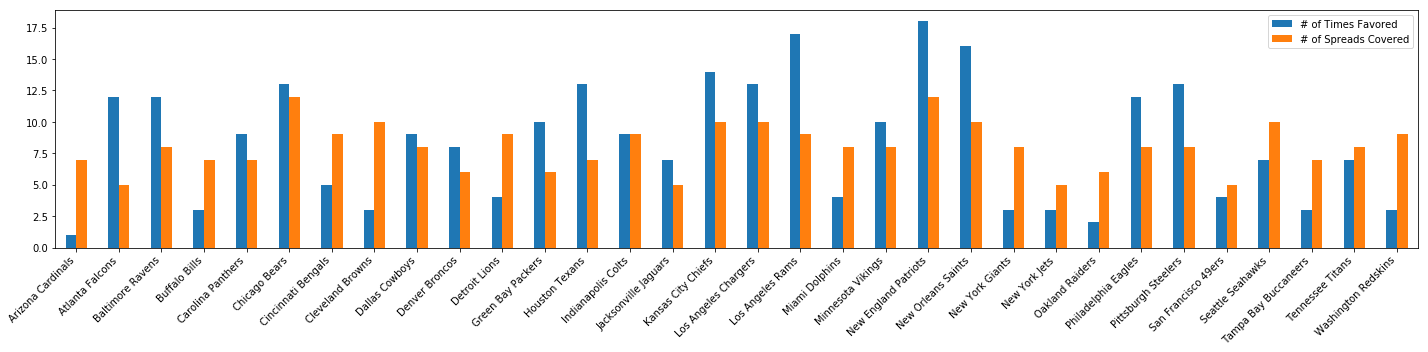

In [33]:
multi_plot = new_chart12345.plot(kind="bar", figsize=(20,5))

multi_plot.set_xticklabels(new_chart12345["Team"], rotation=45, ha = "right")



#plt.ylabel('Wins')
plt.tight_layout()
#plt.savefig('wins_vs_winsATS_barchart.png')

plt.show()

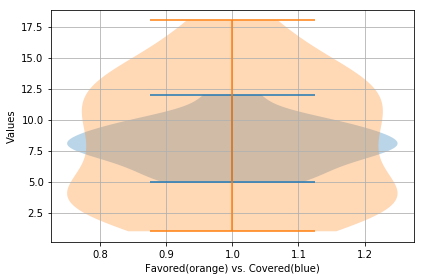

In [34]:
plt.violinplot(new_chart12345["# of Spreads Covered"])
plt.violinplot(new_chart12345["# of Times Favored"])

plt.ylabel('Values')
plt.xlabel('Favored(orange) vs. Covered(blue)')
plt.tight_layout()
plt.savefig('Favored_teams_vs_spreads_covered.png')


plt.grid()
plt.show()


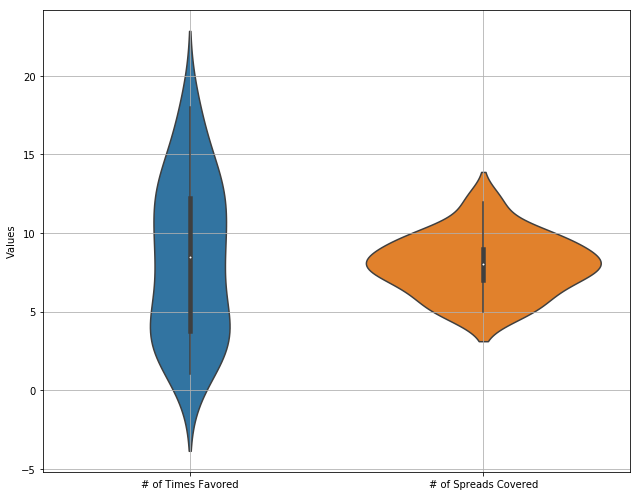

In [35]:
fig, ax = pyplot.subplots(figsize =(9, 7)) 

sns.violinplot(ax = ax, data = new_chart12345)
ax.set_ylabel('Values')
plt.tight_layout()
#plt.savefig('wins_vs_winsATS_violinchart.png')
plt.grid()

plt.show()



In [36]:
new_chart

,Favorite,Underdog,Spread,Loser/Tie,YdsW,YdsL,Pts Diff,Spread Winner
0,Atlanta Falcons,Philadelphia Eagles,-1.0,Atlanta Falcons,232,299,6,Philadelphia Eagles
1,Tennessee Titans,Miami Dolphins,-1.0,Tennessee Titans,342,336,7,Miami Dolphins
2,Minnesota Vikings,San Francisco 49ers,-6.0,San Francisco 49ers,343,327,8,Minnesota Vikings
3,New England Patriots,Houston Texans,-6.0,Houston Texans,389,325,7,New England Patriots
4,New Orleans Saints,Tampa Bay Buccaneers,-10.0,New Orleans Saints,529,475,8,Tampa Bay Buccaneers
5,Jacksonville Jaguars,New York Giants,-2.5,New York Giants,305,324,5,Jacksonville Jaguars
6,Baltimore Ravens,Buffalo Bills,-7.5,Buffalo Bills,369,153,44,Baltimore Ravens
7,Pittsburgh Steelers,Cleveland Browns,-3.5,Cleveland Browns,472,327,0,Cleveland Browns
8,Cincinnati Bengals,Indianapolis Colts,-1.0,Indianapolis Colts,330,380,11,Cincinnati Bengals
9,Los Angeles Chargers,Kansas City Chiefs,-3.5,Los Angeles Chargers,362,541,10,Kansas City Chiefs


In [37]:
new_chart_pt_diff = new_chart.loc[new_chart['Pts Diff'] < 10] 

In [38]:
new_chart_pt_diff.head()


,Favorite,Underdog,Spread,Loser/Tie,YdsW,YdsL,Pts Diff,Spread Winner
0,Atlanta Falcons,Philadelphia Eagles,-1.0,Atlanta Falcons,232,299,6,Philadelphia Eagles
1,Tennessee Titans,Miami Dolphins,-1.0,Tennessee Titans,342,336,7,Miami Dolphins
2,Minnesota Vikings,San Francisco 49ers,-6.0,San Francisco 49ers,343,327,8,Minnesota Vikings
3,New England Patriots,Houston Texans,-6.0,Houston Texans,389,325,7,New England Patriots
4,New Orleans Saints,Tampa Bay Buccaneers,-10.0,New Orleans Saints,529,475,8,Tampa Bay Buccaneers


In [39]:
spread_winner123 = []


for i in range(len(new_chart_pt_diff)):
    
    if (new_chart_pt_diff['Pts Diff'][i] + new_chart_pt_diff['Spread'][i] > 0) and (new_chart_pt_diff['Favorite'][i] == new_chart_pt_diff['Spread Winner'][i]):
        spread_winner123.append(new_chart12345['Favorite'][i])
    elif (new_chart_pt_diff['Pts Diff'][i]) + (new_chart_pt_diff['Spread'][i]) < 0 and (new_chart_pt_diff['Favorite'][i] == new_chart_pt_diff[''][i]):
        spread_winner123.append(new_chart12345['Underdog'][i])
    elif (new_chart_pt_diff['Underdog'][i]) == new_chart_pt_diff['Loser/Tie'][i]:
         spread_winner123.append(new_chart12345['Underdog'][i])
    elif new_chart_pt_diff['Pts Diff'][i] + new_chart_pt_diff['Spread'][i] == 0:
         spread_winner123.append('Tie')
        

KeyError: 'Favorite'

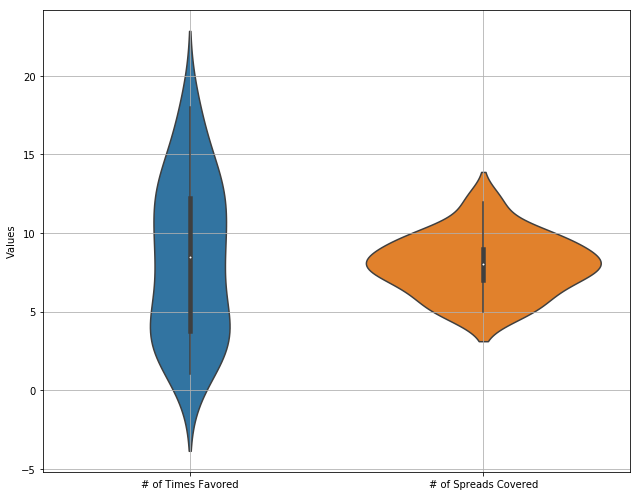

In [55]:
fig, ax = pyplot.subplots(figsize =(9, 7)) 

sns.violinplot(ax = ax, data = new_chart12345)
ax.set_ylabel('Values')
plt.tight_layout()
#plt.savefig('wins_vs_winsATS_violinchart.png')
plt.grid()

plt.show()




In [ ]:
plt.violinplot(new_chart12345["# of Spreads Covered"])
plt.violinplot(new_chart12345["# of Times Favored"])

plt.ylabel('Values')
plt.xlabel('Favored(orange) vs. Covered(blue)')
plt.tight_layout()
plt.savefig('Favored_teams_vs_spreads_covered.png')


plt.grid()
plt.show()

